## Завдання 1

In [30]:
import os
import glob
import pandas as pd
from PIL import Image
from IPython.display import display, HTML


def get_image_info(folder_path):
    image_extensions = {"jpg", "jpeg", "png", "PNG"}
    image_files = [f for f in glob.glob(os.path.join(folder_path, "*")) if f.split('.')[-1].lower() in image_extensions]
    
    data = []
    for img_path in image_files:
        try:
            with Image.open(img_path) as img:
                img_format = img.format
                color_model = img.mode
                channels = len(img.getbands())
                width, height = img.size
                file_size = round(os.path.getsize(img_path) / (1024), 2)
                
                img.thumbnail((100, 100))
                img_tag = f'<img src="{img_path}" width="100" height="100">'
                
                data.append({
                    "name": os.path.basename(img_path),
                    "color model": color_model,
                    "format": img_format,
                    "channels": channels,
                    "size (kb)": file_size,
                    "width": width,
                    "height": height,
                    "full path": img_path,
                    "image": img_tag
                })
        except Exception as e:
            print(f"Ошибка обработки {img_path}: {e}")
    
    df = pd.DataFrame(data)
    return df

folder = "images"
df = get_image_info(folder)

HTML(df.to_html(escape=False))


,name,color model,format,channels,size (kb),width,height,full path,image
0,car-967470_1920.png,RGBA,PNG,4,1557.34,1920,1009,images\car-967470_1920.png,
1,fruit-1218133_1280.png,RGBA,PNG,4,1036.73,1280,961,images\fruit-1218133_1280.png,
2,fruit-1218166_1280.png,RGBA,PNG,4,1886.26,1206,1280,images\fruit-1218166_1280.png,
3,images.jpg,RGB,JPEG,3,7.59,194,260,images\images.jpg,
4,photo_2024-03-01_13-58-49.jpg,RGB,JPEG,3,30.72,500,491,images\photo_2024-03-01_13-58-49.jpg,
5,photo_2024-10-12_18-38-07.jpg,RGB,JPEG,3,142.49,1000,1000,images\photo_2024-10-12_18-38-07.jpg,
6,photo_2024-10-20_22-41-16.jpg,RGB,JPEG,3,189.46,923,1149,images\photo_2024-10-20_22-41-16.jpg,
7,photo_2024-10-27_05-31-13.jpg,RGB,JPEG,3,132.03,1024,1024,images\photo_2024-10-27_05-31-13.jpg,
8,photo_2024-10-27_05-31-14.jpg,RGB,JPEG,3,124.71,1024,1024,images\photo_2024-10-27_05-31-14.jpg,
9,photo_2025-01-20_10-14-22.jpg,RGB,JPEG,3,74.20,720,868,images\photo_2025-01-20_10-14-22.jpg,


## Завдання 2

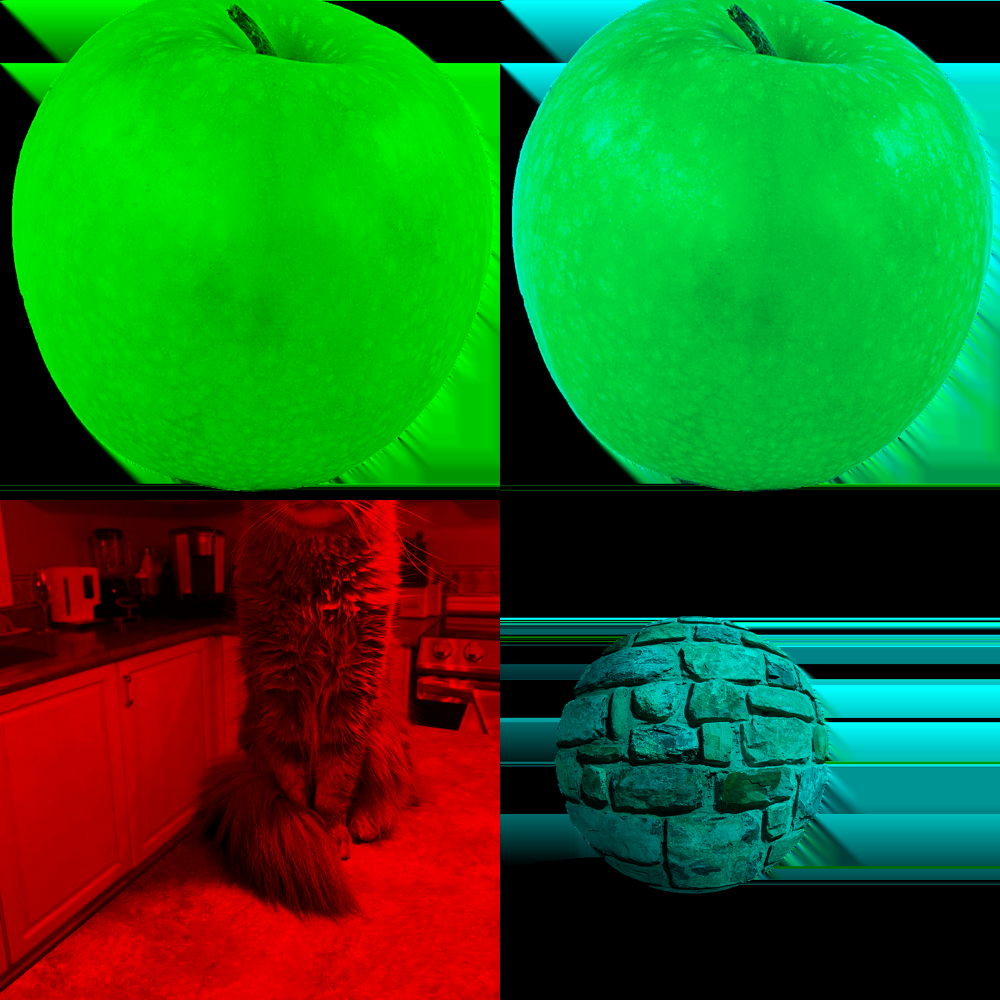

In [32]:
import os
import glob
import random
import cv2
import numpy as np
from PIL import Image

def apply_color_filter(image, filter_name):
    filters = {
        "red": (1, 0, 0),
        "green": (0, 1, 0),
        "blue": (0, 0, 1),
        "yellow": (1, 1, 0),
        "cyan": (0, 1, 1),
        "magenta": (1, 0, 1)
    }
    filter_matrix = np.array(filters[filter_name], dtype=np.float32)
    image_array = np.array(image, dtype=np.float32)
    filter_matrix = filter_matrix.reshape(1, 1, 3)
    filtered_image = (image_array * filter_matrix).clip(0, 255).astype(np.uint8)
    return Image.fromarray(filtered_image)

def crop_to_square(image):
    width, height = image.size
    side = min(width, height)
    left = (width - side)
    top = (height - side)
    right = left + side
    bottom = top + side
    return image.crop((left, top, right, bottom))

def generate_poster(folder_path, output_name, cols, rows, save_folder="posters"):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    
    image_files = glob.glob(os.path.join(folder_path, "*"))
    image_files = [f for f in image_files if f.lower().endswith((".jpg", ".jpeg", ".png", ".PNG"))]
    target_size = (500, 500)
    images = []
    for _ in range(cols * rows):
        img_path = random.choice(image_files)
        with Image.open(img_path) as img:
            if img.mode == "P":
                img = img.convert("RGBA")
            if img.mode == "RGBA":
                img = img.convert("RGB")
            
            img = crop_to_square(img)
            img = img.resize(target_size)
            filter_name = random.choice(["red", "green", "blue", "yellow", "cyan", "magenta"])
            img = apply_color_filter(img, filter_name)
            images.append(img)
    
    poster_width = cols * target_size[0]
    poster_height = rows * target_size[1]
    poster = Image.new("RGB", (poster_width, poster_height))
    for i in range(rows):
        for j in range(cols):
            poster.paste(images[i * cols + j], (j * target_size[0], i * target_size[1]))
    output_path = os.path.join(save_folder, output_name)
    poster.save(output_path)
    return poster

poster = generate_poster("Images", "poster2.jpg", 2, 2)
poster
